In [2]:
import geopandas as gpd

In [3]:
world_filepath = gpd.datasets.get_path("naturalearth_lowres")

In [4]:
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

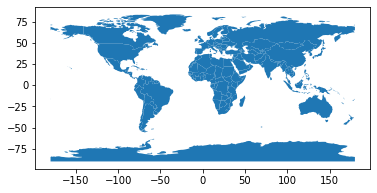

In [5]:
world.plot()

# CRS

In [6]:
import pandas as pd

In [7]:
regions = gpd.read_file("ghana/Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

epsg:32630


In [8]:
facilities_df = pd.read_csv("ghana/health_facilities.csv")
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

In [9]:
facilities.crs = {"init": "epsg:4326"}

/usr/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [10]:
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


<AxesSubplot:>

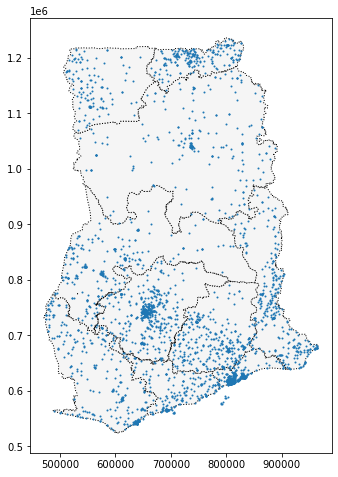

In [11]:
ax = regions.plot(figsize=(8,8), color="whitesmoke", linestyle=":", edgecolor="black")
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [12]:
regions["AREA"] = regions.geometry.area / 10**6

In [13]:
print("Area of Ghana: {} square kilometers".format(regions["AREA"].sum()))

Area of Ghana: 239584.5760055668 square kilometers


# Interactive Maps

In [14]:
import math

In [16]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [17]:
m_1 = folium.Map(location=[42.32, -71.0589], tiles="openstreetmap", zoom_start=10)
m_1

# Manipulating Geospatial Data

In [23]:
import numpy as np
import geopy
from geopandas.tools import geocode

In [24]:
geopy.geocoders.options.default_user_agent = "KaggleTest/1.0"
result = geocode("The Great Pyramid of Giza", provider="nominatim")
result

,geometry,address
0,POINT (31.13422 29.97916),"هرم خوفو, شارع ابو الهول السياحي, نزلة البطران..."


In [25]:
point = result.geometry.iloc[0]
print("Latitude:", point.y)
print("Longitude:", point.x)

Latitude: 29.97915995
Longitude: 31.134215650388754


In [26]:
gpd.sjoin(universities, europe)

NameError: name 'universities' is not defined

# Proximity Analysis

In [27]:
from folium import GeoJson